In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
DF=pd.read_csv("website_traffic.csv")

In [4]:
for i in DF.columns:
    DF.rename(columns={i:i.replace(" ","_")},inplace=True)

In [5]:
DF.head()

,Page_Views,Session_Duration,Bounce_Rate,Traffic_Source,Time_on_Page,Previous_Visits,Conversion_Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [6]:
DF['Traffic_Source'].unique()

array(['Organic', 'Social', 'Paid', 'Direct', 'Referral'], dtype=object)

In [7]:
DF.isnull().sum()

Page_Views          0
Session_Duration    0
Bounce_Rate         0
Traffic_Source      0
Time_on_Page        0
Previous_Visits     0
Conversion_Rate     0
dtype: int64

In [8]:
numerical_columns=[i for i in DF.select_dtypes('number')]

In [9]:
continuous_vars=DF.select_dtypes('number')

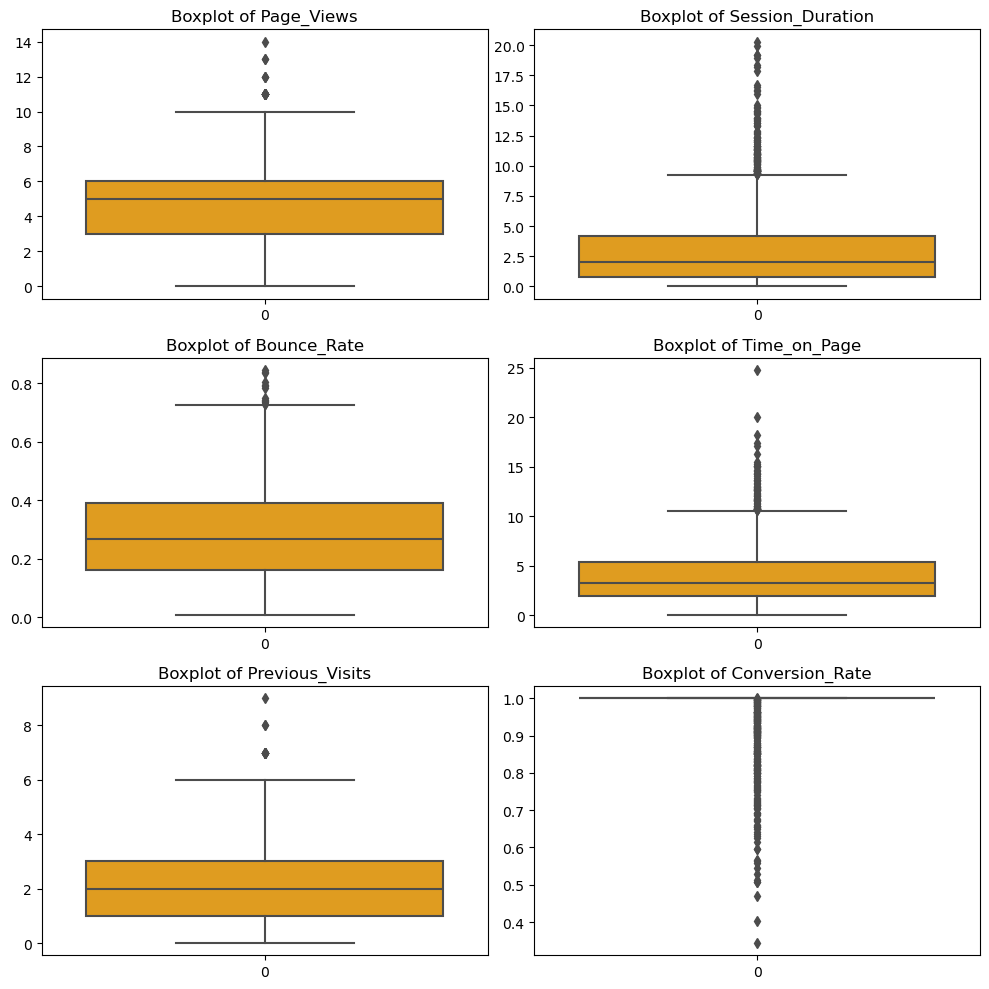

In [10]:
plt.figure(figsize=(10,10))
for i, var in enumerate(continuous_vars):
    plt.subplot(3,2,i+1)
    sns.boxplot(DF[var], color='orange')
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

In [11]:
cleaned_df=DF.copy()
for var in continuous_vars:
    Q1=cleaned_df[var].quantile(0.25)
    Q3=cleaned_df[var].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    cleaned_df=cleaned_df[(cleaned_df[var]>=lower_bound)&(cleaned_df[var]<=upper_bound)]
cleaned_df.head()

,Page_Views,Session_Duration,Bounce_Rate,Traffic_Source,Time_on_Page,Previous_Visits,Conversion_Rate
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0
5,3,4.541868,0.420740,Social,3.438712,2,1.0


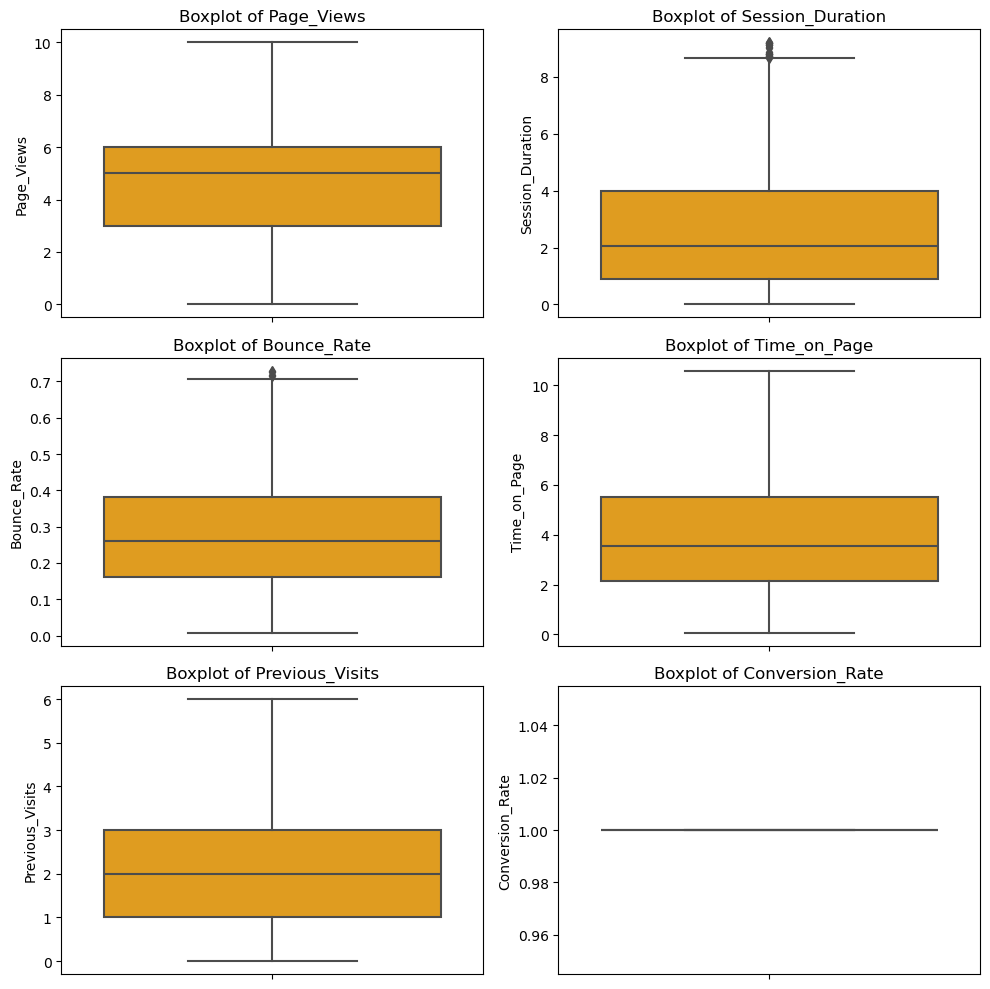

In [12]:
plt.figure(figsize=(10,10))
for i, var in enumerate(continuous_vars):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=cleaned_df[var], color='orange')
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

In [13]:
dummies=pd.get_dummies(DF.Traffic_Source,dtype=int)

In [14]:
dummies

,Direct,Organic,Paid,Referral,Social
0,0,1,0,0,0
1,0,0,0,0,1
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
1995,0,0,0,1,0
1996,0,1,0,0,0
1997,0,1,0,0,0
1998,0,0,1,0,0


In [15]:
merged=pd.concat([DF,dummies],axis='columns')

In [16]:
merged

,Page_Views,Session_Duration,Bounce_Rate,Traffic_Source,Time_on_Page,Previous_Visits,Conversion_Rate,Direct,Organic,Paid,Referral,Social
0,5,11.051381,0.230652,Organic,3.890460,3,1.0,0,1,0,0,0
1,4,3.429316,0.391001,Social,8.478174,0,1.0,0,0,0,0,1
2,4,1.621052,0.397986,Organic,9.636170,2,1.0,0,1,0,0,0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0,0,1,0,0,0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0,0,0,0,1,0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0,0,1,0,0,0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0,0,1,0,0,0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0,0,0,1,0,0


# Conduct EDA to understand the distribution of variables and their relationships with the target variable Conversion Rate.

In [17]:
Cat_Count=DF['Traffic_Source'].value_counts().rename('count').reset_index().sort_values(by='count',ascending=False)

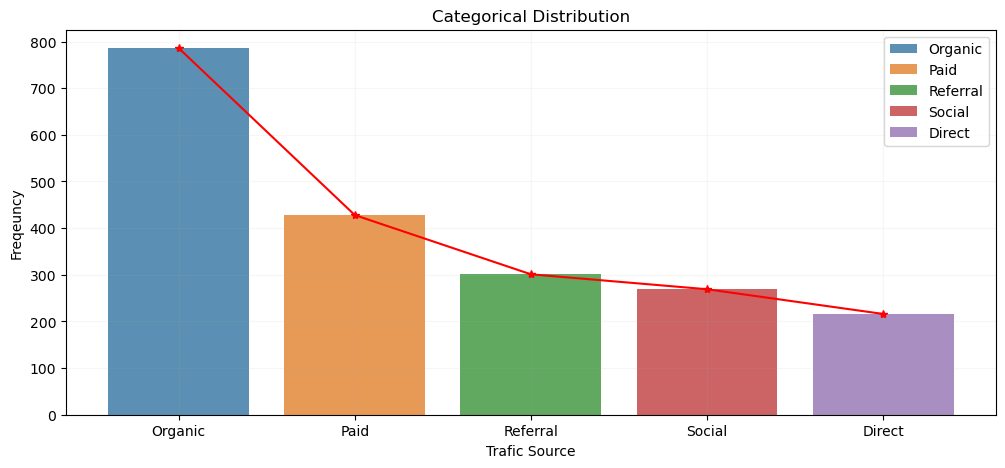

In [18]:
plt.figure(figsize=(12,5))
sns.barplot(x=Cat_Count['Traffic_Source'],y=Cat_Count['count'],alpha=0.8,label=Cat_Count['Traffic_Source'])
plt.plot(Cat_Count['Traffic_Source'],Cat_Count['count'],color='red',marker='*')
plt.title('Categorical Distribution')
plt.xlabel('Trafic Source')
plt.ylabel('Freqeuncy')
plt.grid(True,alpha=0.1)
plt.legend()
plt.show()

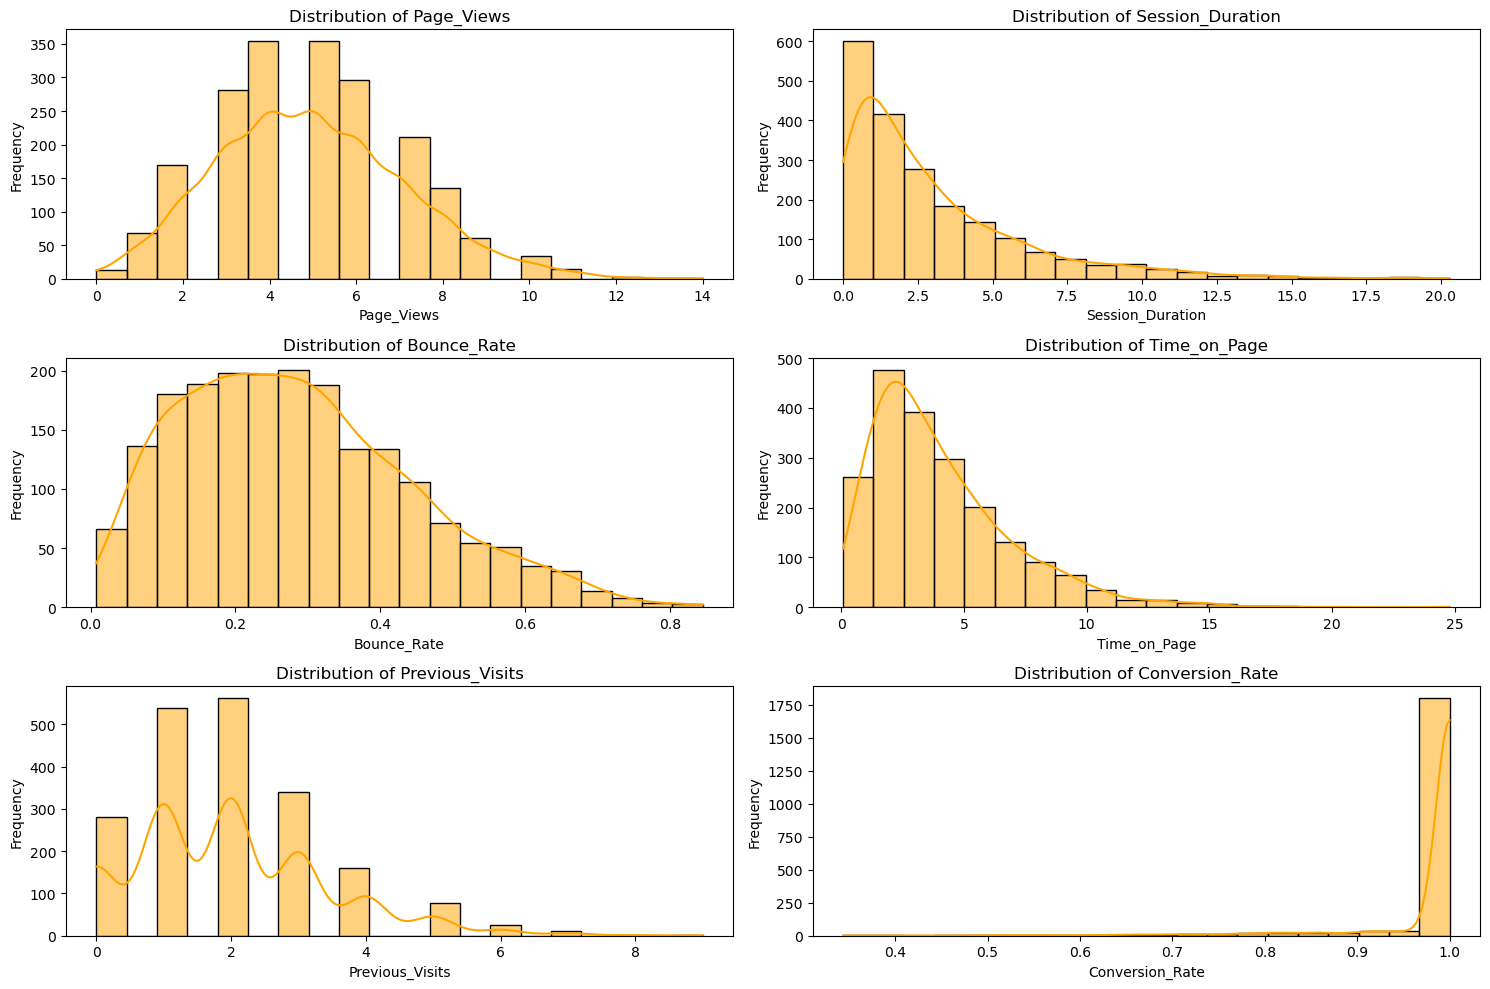

In [19]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(3, 2, i + 1)
    sns.histplot(DF[var], bins=20, kde=True, color='orange')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

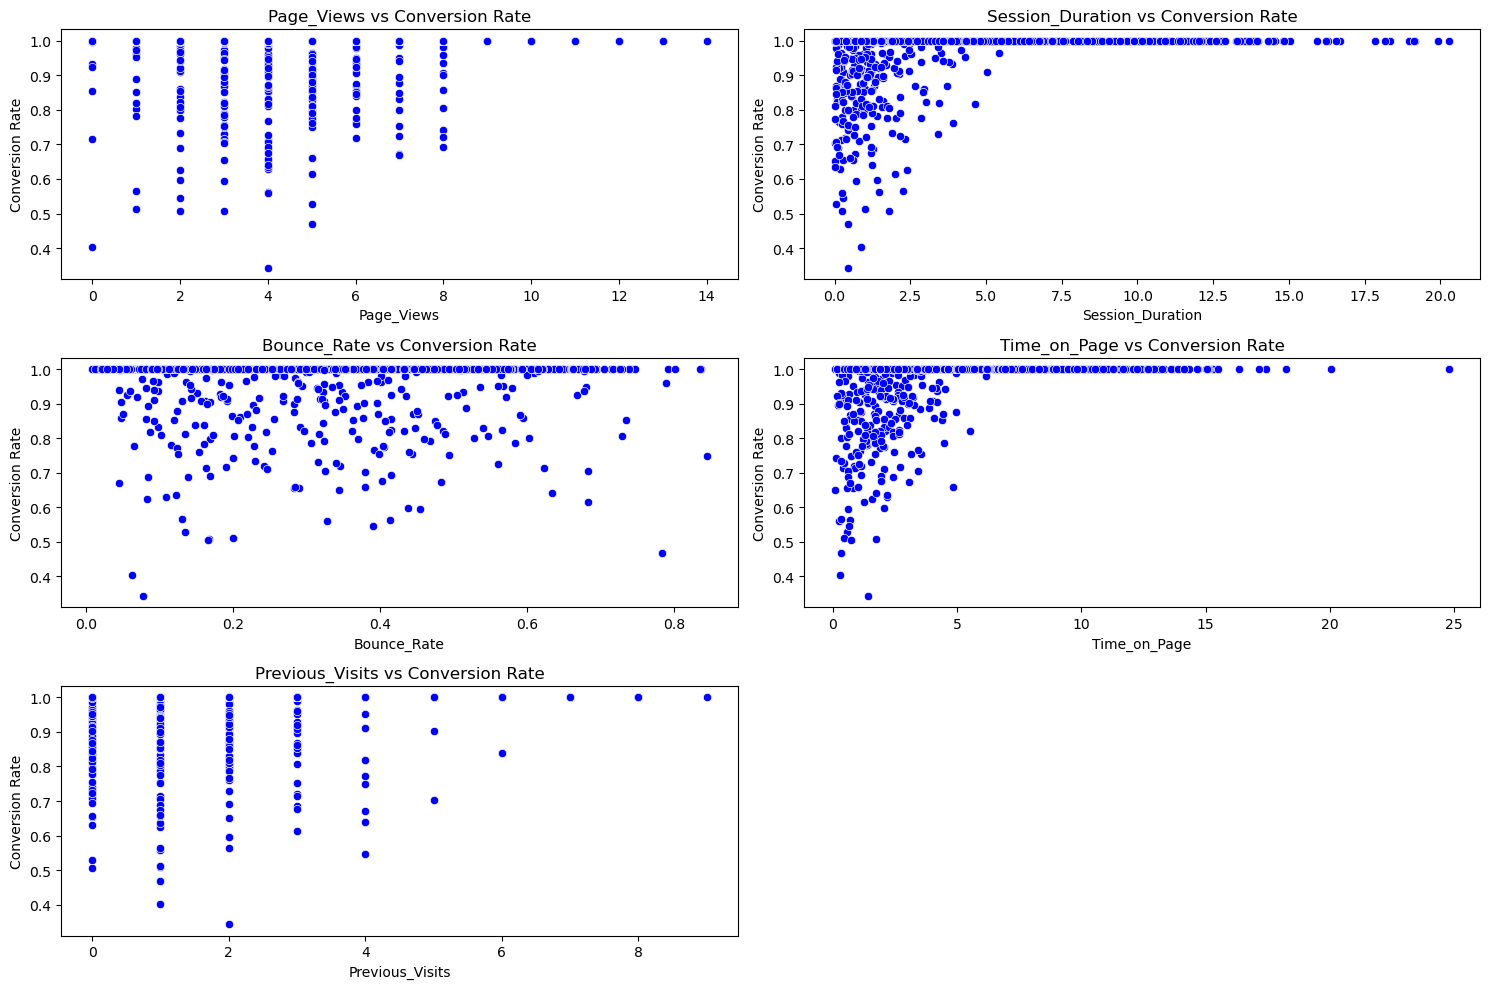

In [20]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars.drop(columns='Conversion_Rate')): 
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(x=DF[var], y=DF['Conversion_Rate'], color='blue')
    plt.title(f'{var} vs Conversion Rate')
    plt.xlabel(var)
    plt.ylabel('Conversion Rate')
plt.tight_layout()
plt.show()

# <h1 style="text-align: center;">Multiple Linear Regression</h1>

In [21]:
excluded_columns = ['Traffic_Source', 'Conversion_Rate']
x=merged.drop(columns=excluded_columns)
y=merged['Conversion_Rate']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
li_model=LinearRegression()

In [24]:
li_model.fit(x_train,y_train)

LinearRegression()

In [25]:
ypred=li_model.predict(x_test)

In [26]:
mae=mean_absolute_error(y_test, ypred)
mse=mean_squared_error(y_test, ypred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, ypred)

In [27]:
n=x_test.shape[0]  
p=x_test.shape[1]  
adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)

In [28]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')
print(f'Adjusted R-squared (Adjusted R²): {adjusted_r2}')

Mean Absolute Error (MAE): 0.031633855428908196
Mean Squared Error (MSE): 0.0027909306685936597
Root Mean Squared Error (RMSE): 0.052829259587785816
R-squared (R²): 0.1062626687623428
Adjusted R-squared (Adjusted R²): 0.08328741603129775


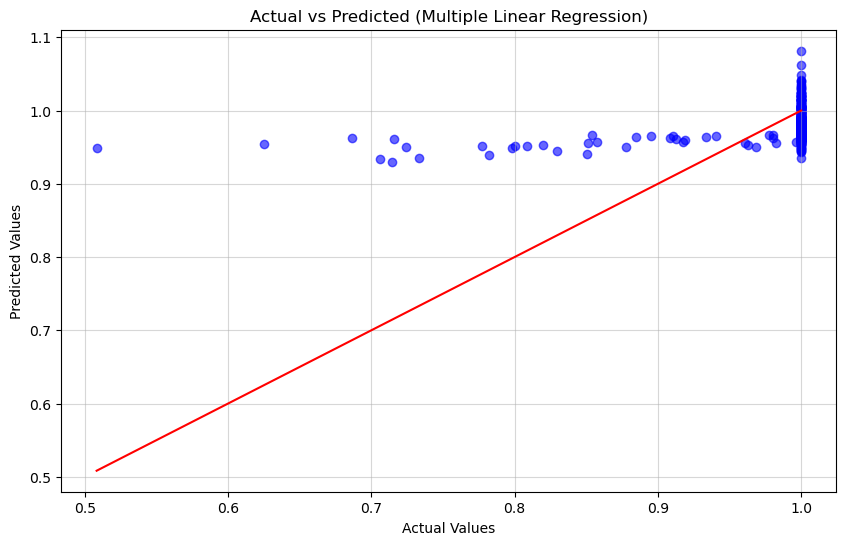

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, ypred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color='red') 
plt.title('Actual vs Predicted (Multiple Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True,alpha=0.5)
plt.show()

In [30]:
DFPRED_M=pd.DataFrame({'Actual':y_test,'Predicted':ypred})

In [31]:
DFPRED_M['Residuals']=DFPRED_M['Actual']-DFPRED_M['Predicted']

In [32]:
DFPRED_M.head()

,Actual,Predicted,Residuals
1860,1.000000,0.991450,0.008550
353,1.000000,1.006208,-0.006208
1333,1.000000,0.986638,0.013362
905,0.908468,0.962919,-0.054451
1289,1.000000,0.990441,0.009559


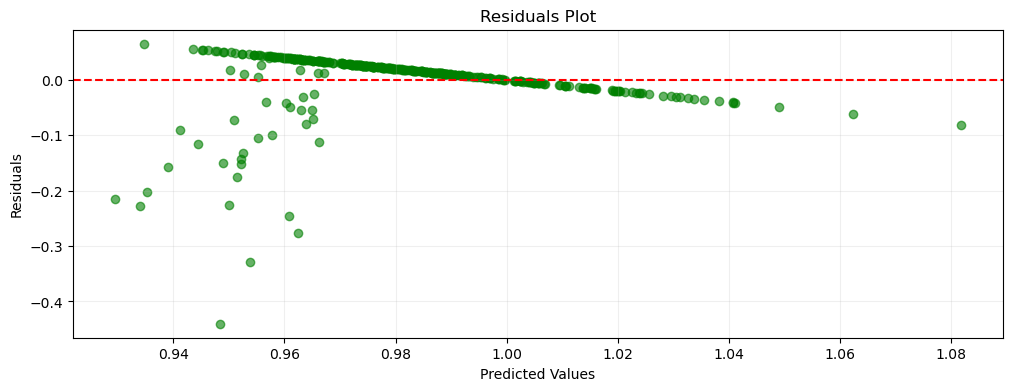

In [33]:
plt.figure(figsize=(12,4))
plt.scatter(DFPRED_M['Predicted'], DFPRED_M['Residuals'], color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(alpha=0.2)
plt.show()

***

# <h1 style="text-align: center;">Polynomial Linear Regression</h1>

In [34]:
degree=3  
poly=PolynomialFeatures(degree=degree,include_bias=False)
x_train_ploy=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)
poly_model=LinearRegression()
poly_model.fit(x_train_ploy,y_train)

LinearRegression()

In [35]:
ypredpoly=poly_model.predict(x_test_poly)

In [36]:
mae_poly=mean_absolute_error(y_test,ypredpoly)
mse_poly=mean_squared_error(y_test,ypredpoly)
rmse_poly=np.sqrt(mse_poly)
r2_poly=r2_score(y_test, ypredpoly)

In [37]:
n=x_test.shape[0]  
p=x_test.shape[1]  
adjusted_r2_poly=1-(1-r2_poly)*(n-1)/(n-p-1)

In [38]:
print(f'Mean Absolute Error (MAE_POLY): {mae_poly}')
print(f'Mean Squared Error (MSE_POLY): {mse_poly}')
print(f'Root Mean Squared Error (RMSE_POLY): {rmse_poly}')
print(f'R-squared (R²_POLY): {r2_poly}')
print(f'Adjusted R-squared (Adjusted R²_POLY): {adjusted_r2_poly}')

Mean Absolute Error (MAE_POLY): 0.026854577408979657
Mean Squared Error (MSE_POLY): 0.0021191931277450477
Root Mean Squared Error (RMSE_POLY): 0.04603469482624
R-squared (R²_POLY): 0.32137260460059236
Adjusted R-squared (Adjusted R²_POLY): 0.3039271702715588


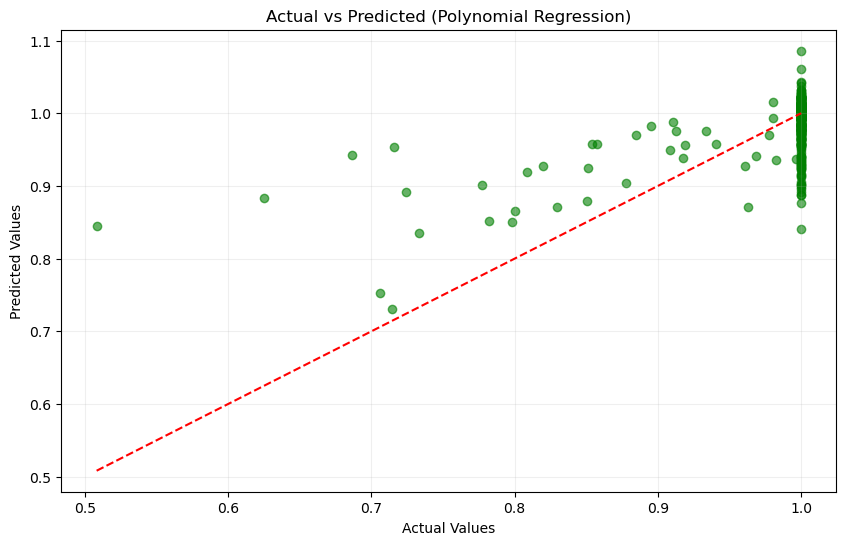

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, ypredpoly, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted (Polynomial Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(alpha=0.2)
plt.show()

In [40]:
DFPRED_P=pd.DataFrame({'Actual':y_test,'Predicted':ypredpoly})

In [41]:
DFPRED_P['Residuals']=DFPRED_P['Actual']-DFPRED_P['Predicted']

In [42]:
DFPRED_P.head()

,Actual,Predicted,Residuals
1860,1.000000,1.016079,-0.016079
353,1.000000,1.012323,-0.012323
1333,1.000000,1.008231,-0.008231
905,0.908468,0.950032,-0.041564
1289,1.000000,1.014694,-0.014694


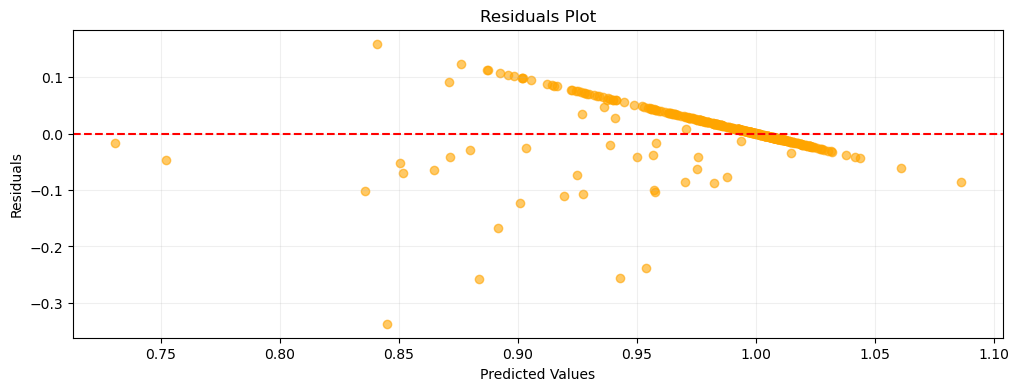

In [44]:
plt.figure(figsize=(12,4))
plt.scatter(DFPRED_P['Predicted'], DFPRED_P['Residuals'], color='orange', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(alpha=0.2)
plt.show()

# Comparison and Interpretation of Regression Models

## Error Metrics (MAE, MSE, RMSE)

- **Mean Absolute Error (MAE)**:
  - Polynomial Regression: **0.0269**
  - Multiple Linear Regression: **0.0316**
  
  This indicates that the polynomial model makes predictions that are closer to the actual values on average, leading to better overall accuracy.

- **Mean Squared Error (MSE)**:
  - Polynomial Regression: **0.00212**
  - Multiple Linear Regression: **0.00279**

- **Root Mean Squared Error (RMSE)**:
  - Polynomial Regression: **0.0460**
  - Multiple Linear Regression: **0.0528**
***
## R-squared Values

- **R-squared**:
  - Polynomial Regression: **0.3214**
  - Multiple Linear Regression: **0.1063**
  
  This suggests that the polynomial regression model explains a greater proportion of the variance in the target variable.
***
## Adjusted R-squared

- **Adjusted R-squared**:
  - Polynomial Regression: **0.3039**
  - Multiple Linear Regression: **0.0833**
  
  Adjusted R-squared accounts for the number of predictors in the model, indicating that the polynomial model is not only fitting the training data better but also doing so in a more statistically valid manner.

***

## Conclusion

The polynomial regression model outperforms the multiple linear regression model across all metrics provided. The lower error values and higher R-squared values suggest that the polynomial model captures the underlying relationships in the data more effectively, which is likely due to its ability to account for non-linear relationships.
